# Linear Regression

Linear Regression is a method used in machine learning for predicting a target variable by fitting the best linear relationship between the dependent and independent variables.

## Linear Regression Model Prediction

- The linear regression model prediction is a function of the form:
  
  `y = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ`
  
  where:
  
  - `y` is the predicted value.
  - `θ₀` is the bias term, also known as the intercept term.
  - `θ₁, θ₂, ..., θₙ` are the model parameters corresponding to the features.
  - `x₁, x₂, ..., xₙ` are the feature values.

## Vectorized Form of Linear Regression

- The prediction can be represented in a vectorized form as:

  `ŷ = h_θ(x) = θ^T • x`

  where:
  
  - `θ` is the parameter vector, including the bias `θ₀` and the feature weights `θ₁` to `θₙ`.
  - `x` is the feature vector, with `x₀` (bias feature) always equal to 1.
  - `•` denotes the dot product of the vectors `θ` and `x`.
  - `h_θ` is the hypothesis function.

## Training the Model

- Training the linear regression model involves finding the parameter vector `θ` that minimizes the cost function.
- The most common performance measure for regression is the Mean Square Error (MSE), which is computed as:

  `MSE(X, h_θ) = 1/m ∑(θ^T • x^(i) - y^(i))²`

  where:
  
  - `m` is the number of instances in the training set.
  - `x^(i)` and `y^(i)` are the feature vector and label of the i-th instance, respectively.
  - The cost function evaluates the difference between the predicted value `θ^T • x^(i)` and the actual label `y^(i)` for each instance in the training set.

- The goal of training is to minimize `MSE(θ)`.

By adjusting `θ` using a method like gradient descent, the linear regression model can be trained to make accurate predictions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed=42

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

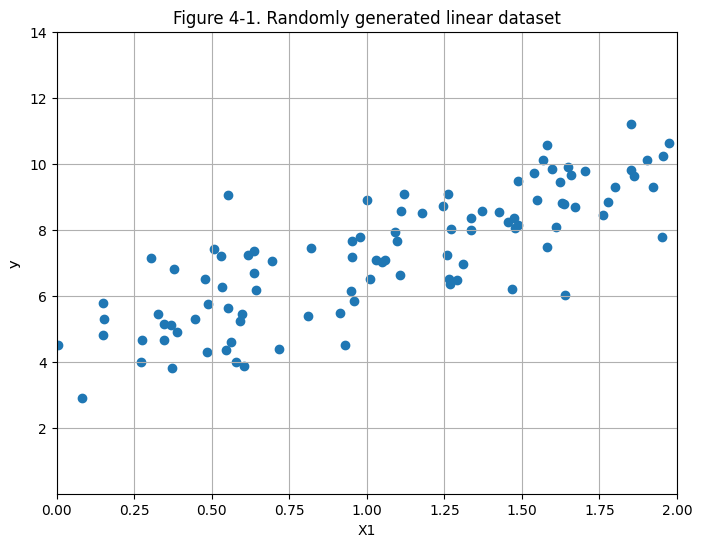

In [3]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size based on your needs

# Set x and y limits
plt.xlim(0, 2)
plt.ylim(0, 14)

# Set ticks (adjust if needed based on the range of your data)
plt.xticks(np.arange(0, 2.25, 0.25))
plt.yticks(np.arange(2, 16, 2))

# Customize labels and title
plt.xlabel('X1')
plt.ylabel('У')  # Use Cyrillic character 'У'
plt.title('Figure 4-1. Randomly generated linear dataset')

plt.scatter(X, y)
plt.grid(True)  # Add grid lines for better readability (optional)
plt.show()



In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.22544795],
       [2.85634158]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.22544795],
       [9.9381311 ]])

In [64]:
X_new

array([[0],
       [2]])

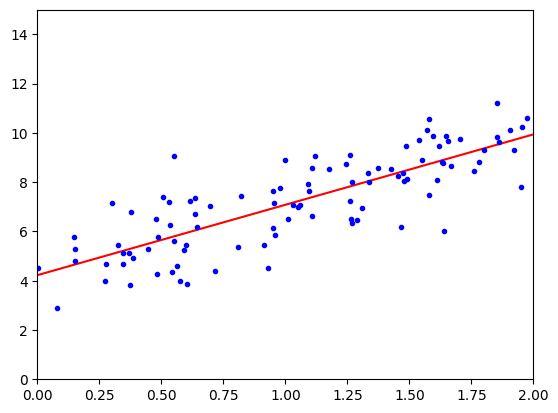

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.22544795]), array([[2.85634158]]))

In [9]:
lin_reg.predict(X_new)

array([[4.22544795],
       [9.9381311 ]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.22544795],
       [2.85634158]])

In [25]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [26]:
theta

array([[-4.51903888e+104],
       [-5.45521460e+104]])

In [37]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

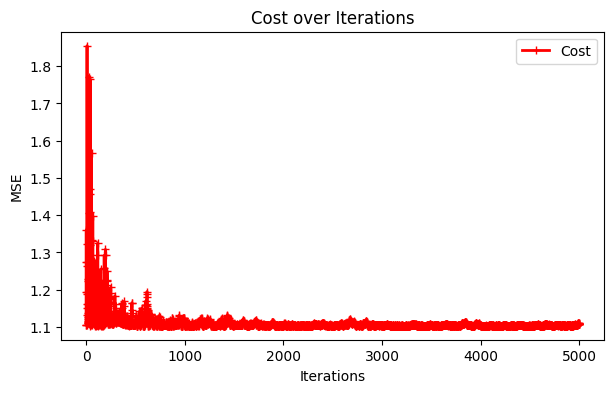

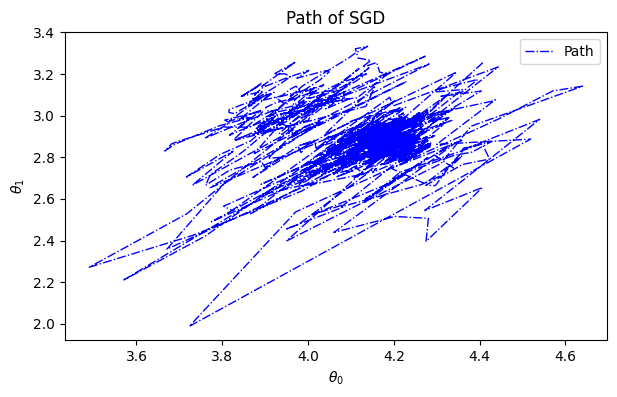

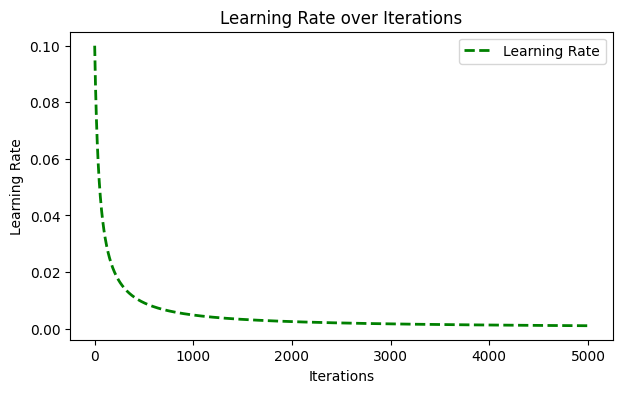

In [41]:
# Lists to store the values of theta and costs for plotting
theta_path_sgd = []
costs = []
learning_rates = []

# Stochastic Gradient Descent
for epoch in range(n_epochs):
    for i in range(m):
        y_predict = X_b.dot(theta)
        cost = (y_predict - y)**2
        costs.append(cost.mean())
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+2]
        yi = y[random_index:random_index+2]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        learning_rates.append(eta) # save the learning rate
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

# Convert to Numpy array for plotting
theta_path_sgd = np.array(theta_path_sgd)

# Plot the cost function vs epochs
plt.figure(figsize=(7,4))
plt.plot(np.sqrt(costs), "r-+", linewidth=2, label="Cost")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Cost over Iterations")
plt.legend()
plt.show()

# Plot the path taken by SGD
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "b-.", linewidth=1, label="Path")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title("Path of SGD")
plt.legend()
plt.show()

# Plot the learning rate schedule
plt.figure(figsize=(7,4))
plt.plot(learning_rates, "g--", linewidth=2, label="Learning Rate")
plt.xlabel("Iterations")
plt.ylabel("Learning Rate")
plt.title("Learning Rate over Iterations")
plt.legend()
plt.show()


In [4]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

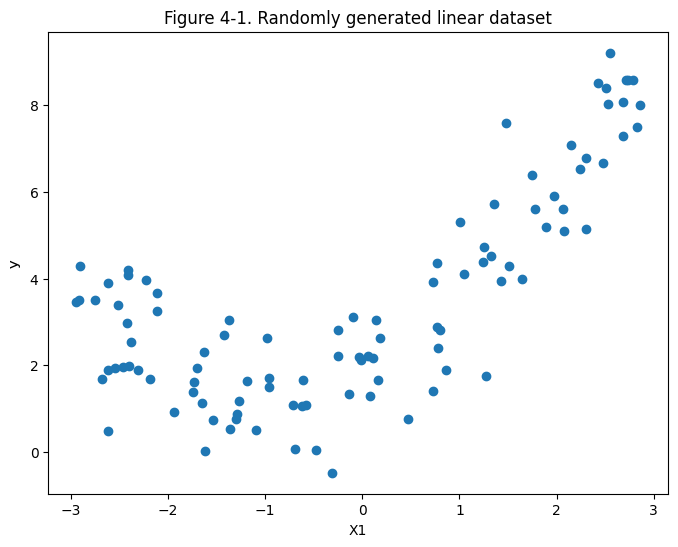

In [156]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size based on your needs


# Customize labels and title
plt.xlabel('X1')
plt.ylabel('У')  # Use Cyrillic character 'У'
plt.title('Figure 4-1. Randomly generated linear dataset')

plt.scatter(X, y)
plt.show()

In [167]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.25220279])

In [168]:
X_poly[0]

array([-0.25220279,  0.06360625])

In [169]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89291554]), array([[0.98062791, 0.51268144]]))

In [170]:
# Make predictions over the range of X
X_new = np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

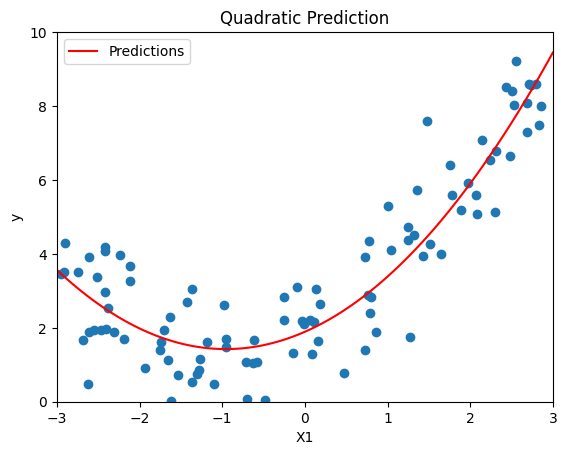

In [171]:
plt.scatter(X, y)
plt.plot(X_new, y_new, "r-", label="Predictions")
# Customize labels and title
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Quadratic Prediction')
plt.axis([-3, 3, 0, 10])
# Show the legend
plt.legend()
plt.show()

In [5]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[4.71232567]])

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([4.68506873])

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

ridge_reg = Pipeline(
        [
            ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ("ridge", Ridge(alpha=1e-07, solver="cholesky"))
        ]
    )

In [27]:
ridge_reg.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1e-07, solver='cholesky'))])

In [28]:
ridge_reg.predict([[1.5]])

array([[4.45115916]])

## Exercises 

### Q1: Suitable Linear Regression Algorithm for Large Number of Features
For a training set with millions of features, it is advisable to use a variant of Gradient Descent. The normal equation would be computationally expensive due to matrix operations. Stochastic Gradient Descent or Mini-batch Gradient Descent are better suited for such scenarios since they do not require matrix inversion.

### Q2: Handling Features with Different Scales
Gradient descent-based algorithms suffer from features with different scales. The cost function can become skewed, making convergence slow. Feature scaling methods, such as standardization or normalization, should be employed to address this problem.

### Q3: Local Minimum in Logistic Regression
The cost function of a Logistic Regression model is convex, thus Gradient Descent will not get stuck in a local minimum; it will converge to the global minimum.

### Q4: Convergence of Gradient Descent Algorithms
All Gradient Descent algorithms will converge to a global minimum if the learning rate is appropriate and they are allowed to run long enough. However, Stochastic and Mini-batch Gradient Descent may oscillate around the minimum, resulting in slightly different models.

### Q5: Increasing Validation Error in Batch Gradient Descent
An increasing validation error suggests overfitting. Implementing early stopping when the validation error starts to increase, using regularization techniques, or adding more data can mitigate this issue.

### Q6: Stopping Mini-batch Gradient Descent on Increase in Validation Error
It is not advisable to stop Mini-batch Gradient Descent immediately when the validation error increases, due to the randomness in the algorithm. Early stopping with a patience parameter is a better strategy.

### Q7: Fastest Converging Gradient Descent Algorithm
Batch Gradient Descent can reach the vicinity of the optimal solution rapidly with a proper learning rate. However, Stochastic Gradient Descent will likely converge in practice by using a learning schedule to decrease the learning rate over time.

### Q8: Large Gap in Learning Curves for Polynomial Regression
A large gap suggests overfitting. Solutions include increasing the training set size, reducing the model complexity, or increasing regularization.

### Q9: Ridge Regression with High Bias
High training and validation errors indicate high bias. The regularization hyperparameter \(\alpha\) should be reduced to allow a better fit.

### Q10: Choosing the Right Regression Model
a. Use Ridge Regression to reduce overfitting through regularization.
b. Use Lasso for feature selection and regularization.
c. Use Elastic Net to balance the properties of Ridge and Lasso.

### Q11: Classifier for Categorizing Pictures
A single Softmax Regression classifier is more efficient for mutually exclusive classes than using two separate Logistic Regression classifiers.

### Q12: Implementing Batch Gradient Descent with Early Stopping
This would involve coding a gradient descent algorithm with an early stopping mechanism to prevent overfitting in a Softmax Regression context.


In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Add intercept term (bias) to feature vector
X_train_scaled_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_val_scaled_with_bias = np.c_[np.ones((X_val_scaled.shape[0], 1)), X_val_scaled]

# Initialize weights randomly and bias terms to zero
n_features_plus_bias = X_train_scaled_with_bias.shape[1]
n_classes = len(np.unique(y_train))
W = np.random.randn(n_features_plus_bias, n_classes)

# Softmax function
def softmax(logits):
    exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy_loss(y_true, y_prob):
    m = len(y_true)
    log_likelihood = -np.log(y_prob[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

# Compute gradient
def compute_gradient(X, y, y_prob):
    m = X.shape[0]
    one_hot_y = np.eye(n_classes)[y]
    gradient = np.dot(X.T, (y_prob - one_hot_y)) / m
    return gradient

# Training parameters
learning_rate = 0.01
n_iterations = 1000
best_loss = np.inf
patience = 20
patience_counter = 0
train_losses = []
val_losses = []

# Training loop
for iteration in range(n_iterations):
    logits = np.dot(X_train_scaled_with_bias, W)
    y_prob = softmax(logits)
    
    # Compute loss and gradient
    loss = cross_entropy_loss(y_train, y_prob)
    gradients = compute_gradient(X_train_scaled_with_bias, y_train, y_prob)
    
    # Update weights
    W -= learning_rate * gradients
    
    # Compute validation loss for early stopping
    logits_val = np.dot(X_val_scaled_with_bias, W)
    y_prob_val = softmax(logits_val)
    loss_val = cross_entropy_loss(y_val, y_prob_val)
    
    # Save losses for plotting
    train_losses.append(loss)
    val_losses.append(loss_val)

    # Check for early stopping
    if loss_val < best_loss:
        best_loss = loss_val
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter > patience:
            print(f"Early stopping on iteration {iteration}, Validation Loss: {loss_val}")
            break

    # Print the loss every 5000 iterations
    if iteration % 500 == 0:
        print(f"Iteration {iteration}, Training Loss: {loss}, Validation Loss: {loss_val}")



Iteration 0, Training Loss: 1.7954623930197997, Validation Loss: 1.7502437114268252
Iteration 500, Training Loss: 0.5362114266630246, Validation Loss: 0.4136841381852345


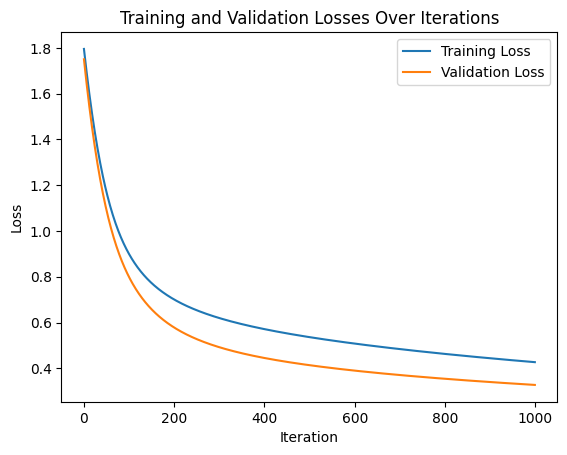

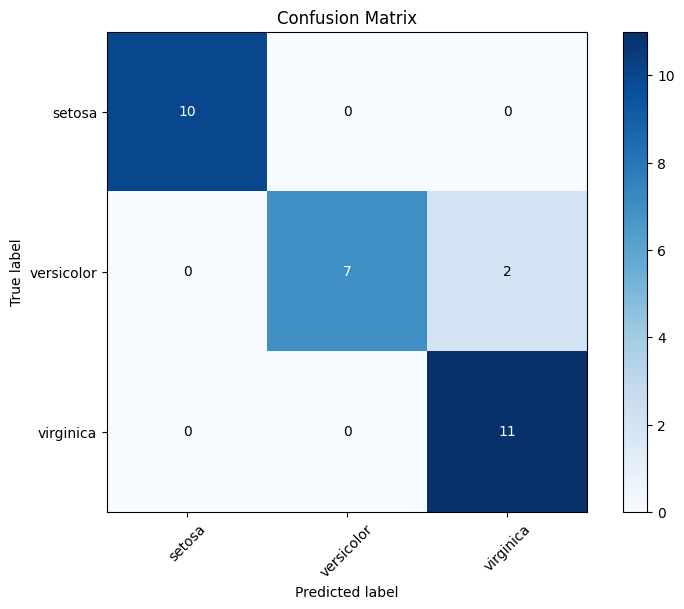

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses Over Iterations')
plt.show()

# Predicting the validation set results
logits_val = np.dot(X_val_scaled_with_bias, W)
y_pred = np.argmax(logits_val, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(iris.target_names))
plt.xticks(ticks, iris.target_names, rotation=45)
plt.yticks(ticks, iris.target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")
plt.show()